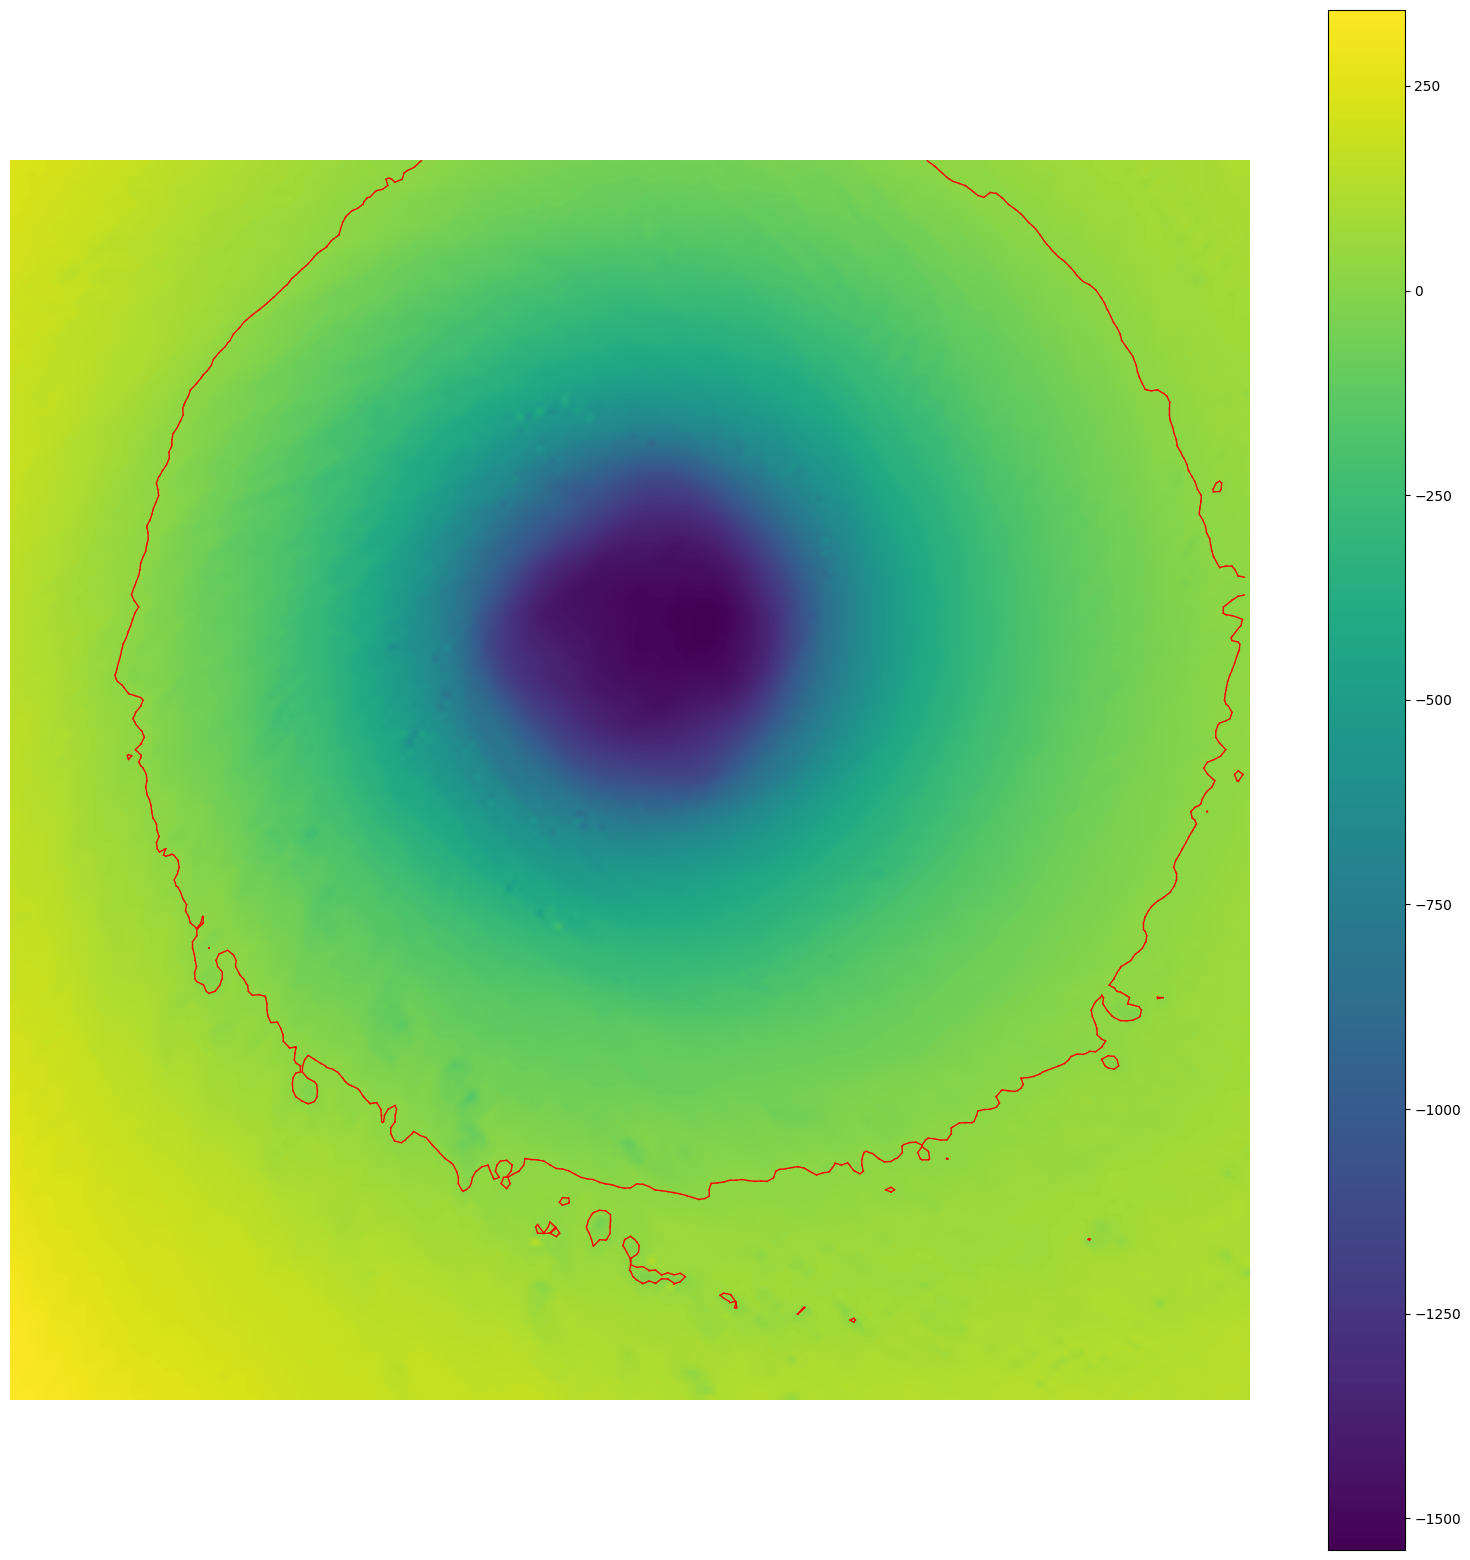

In [29]:
import numpy as np
import matplotlib.pyplot as plt

data2D = 0
data2DPlot = 0

##### draw a line segment between [x0, y0] -> [x1, y1]. color: color of the line semgne
##### DO NOT modify this function
def plotOneEdge(x0, y0, x1, y1, color="white"):
#     plt.plot([y0*5,y1*5], [x0*5,x1*5], linewidth=1, color=color)
    plt.plot([x0*5,x1*5], [y0*5,y1*5], linewidth=1, color=color)

##### x, y: location. Return: data value at [x,y]
##### DO NOT modify this function
def getDataValue(x, y):
    return data2D[x, y]

##### data loading and setup/plot image
##### DO NOT modify this function
def Initialize():
    global data2D
    global data2DPlot
    data2D = np.load("rawData.npy").transpose()
    data2DPlot = np.load("plotData.npy")

    plt.rcParams['figure.figsize'] = [20, 20]
    plt.axis('off')
    plt.imshow(data2DPlot)
    plt.colorbar()

##### (TODO) WORK on this function
#####compute and draw the isocontour of the given datavalue ("isovalue")
#####color: isocontour color
##### you should use "getDataVlue()" to get the data you want and use "plotOneEdge()" to a segment of the isocontour
##### I do not mind the computation is efficnet or not
def interpolation(p1, p2, part):

    def count(x1, x2):
        return (x2 - x1) * (part[0] - part[1]) / (part[0] - part[2]) + x1

    return [count(p1[0], p2[0]), count(p1[1], p2[1])]

def judge(x, y, isovalue, color):
    ps = [[x, y], [x + 1, y], [x, y + 1], [x + 1, y + 1]]
    vs = []
    stats = []
    mid_vals = []

    for p in ps:
        val = getDataValue(p[0], p[1])
        vs.append(val)
        stats.append(1 if val < isovalue else -1)

    if stats[0] * stats[1] < 0:
        mid_vals.append(interpolation(ps[0], ps[1], [vs[0], isovalue, vs[1]]))

    if stats[0] * stats[2] < 0:
        mid_vals.append(interpolation(ps[0], ps[2], [vs[0], isovalue, vs[2]]))

    if stats[1] * stats[3] < 0:
        mid_vals.append(interpolation(ps[1], ps[3], [vs[1], isovalue, vs[3]]))

    if stats[2] * stats[3] < 0:
        mid_vals.append(interpolation(ps[2], ps[3], [vs[2], isovalue, vs[3]]))

    if len(mid_vals) == 2:
        plotOneEdge(mid_vals[0][0], mid_vals[0][1], mid_vals[1][0], mid_vals[1][1], color)

    if len(mid_vals) == 4:
        plotOneEdge(mid_vals[0][0], mid_vals[0][1], mid_vals[1][0], mid_vals[1][1], color)
        plotOneEdge(mid_vals[2][0], mid_vals[2][1], mid_vals[3][0], mid_vals[3][1], color)


def computePlotIsoContour( isovalue, color ):
    assert len(data2D) >= 1
    n = len(data2D)
    m = len(data2D[0])


    for x in range(n - 1):
        for y in range(m - 1):
            judge(x, y, isovalue, color)




##### main
Initialize()

##### You can modify this function call to test your program on different isovalues
computePlotIsoContour(20, "red")

plt.show()